## Insights from the dataset and paper
 * Lots of workout sessions, and reasonable number of users
 * Average span for individual user is 733 days. Seems promising for a longitudinal study on how exercises change heart physiology.
 * During workout, individual's heart rate varies a lot. Factors include gender, workout type, altitude elevation, speed, duration. Other implicit factors could be exercise frequency, how many days since starting of exercise, which we can extract from the data. 
 * Unfortunately, weight and age are important features missing in the dataset. However, we can compare the improvement of heart rate within individual user, and the average effect across users
 * Build a model to predict long-term change of heart rate based on exercise statistics, and give personalized recommendation accordingly
 * Tree model is probably the way to go, because the interaction between features are not trivial/linear. For example, figure 4: altitude influences the heart rate during biking differently from that during running
 

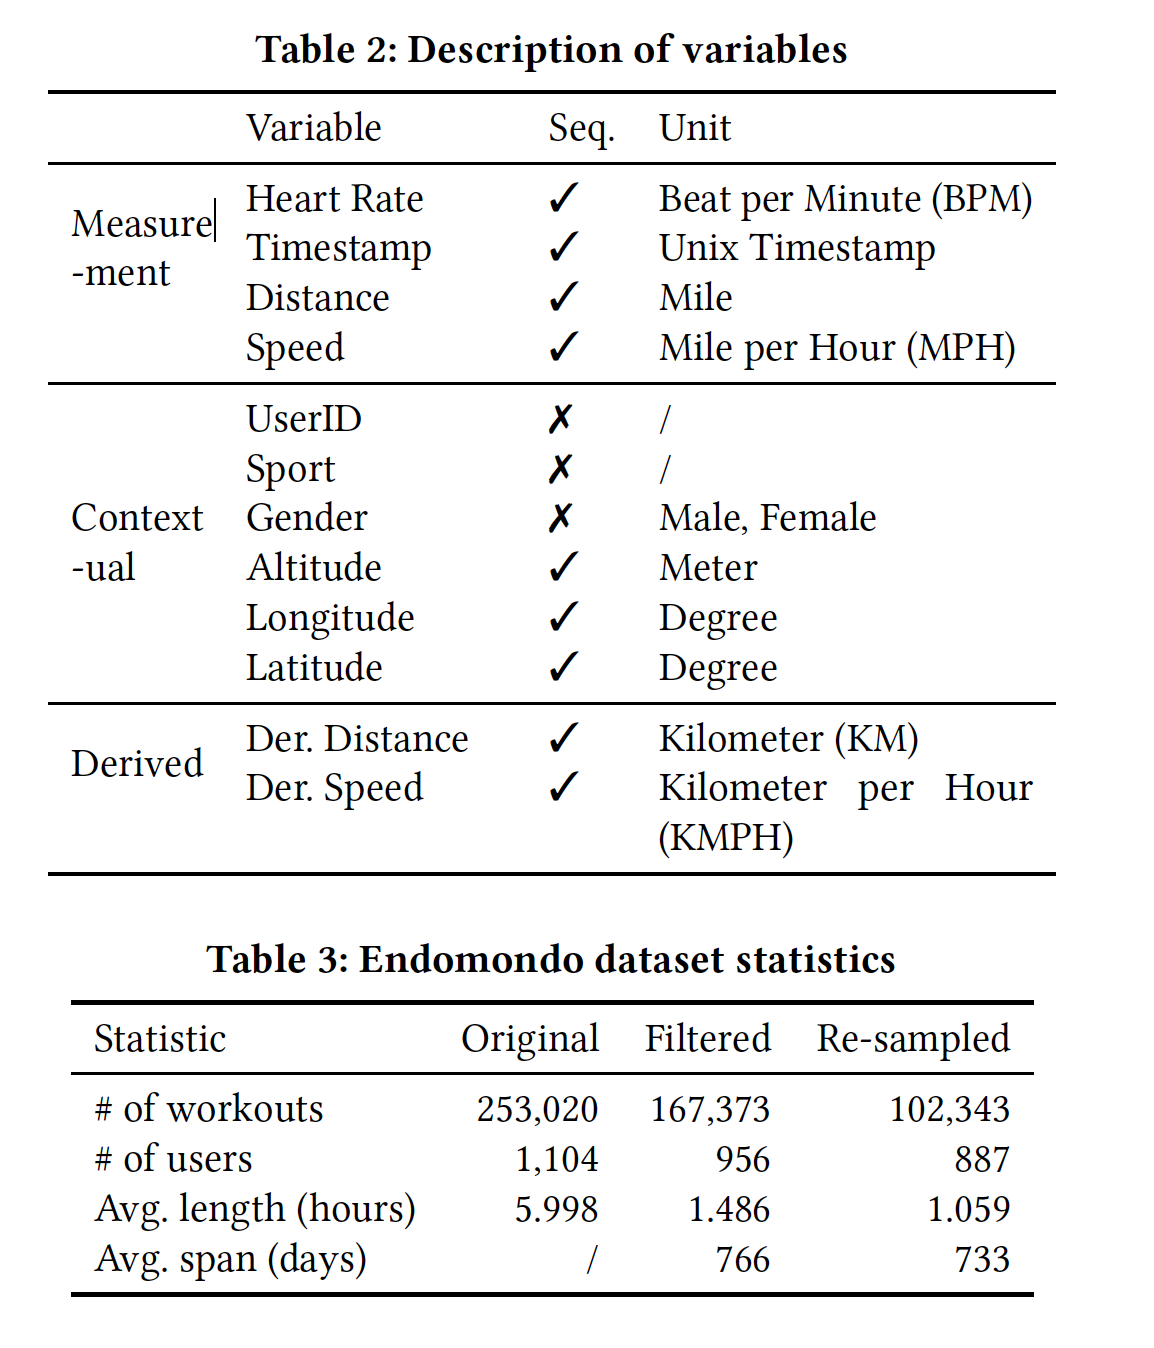

In [4]:
from IPython.display import Image
Image(filename='stats.png',width=400, height=400)

## Extracted Features


| |UserID | Gender | Sport | Duration | Speed_mean | Speed_dev | Distance | Altitude_mean| Altitude_elevation_abs| Altitude_Dev | Longitude | Latitude| Heart_rate| Sessions_since_beginning |
|---:|:-------------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|:-----------|
| Session1 | 100 | male | bike | 3300 | | | | | | | | |||
| Session2 | 200 | female | running | 2700 | | | | | | ||| | |

### 1. A simple RecSys without user data
* Data. Item features will be extracted from text (NLP required). 

| | Feature1(numeric) | Feature2(categorical)... | Descriptions (text) | Customer Reviews Ratings (numeric)| Customer Reviews (text)|
|---:|:-------------|:-----------|:-----------|:-----------|:-----------|
| Item1 | 100 | 'red'   | 'xxxxx'  | 1.0 | 'xxxxx'  | 
| Item2 | 200| 'blue'  | 'xxxxx'  | 4.0 | 'xxxxx'  | 
| Item3 | 200  | 'green'  | 'xxxxx'  | 4.5| 'xxxxx'  | 

* How does it work?
    * vectorize each item -> feature engineering with NLP tools
    * cluster items according to their features -> unsupervised learning methods such as Kmeans, DBSCAN, LDA or get a hierarchical structure
    * We can manually label few examples, and use semi-supervised learning methods for accurate clustering.
    * can also do keyword search. (a search engine)
         * vectorize the search keywords in a similar way as item descriptions
         * match the keyword vector with cluster averaged vector -> return the class tag of the clustering.-> a fuzzy search, from coarse to fine search use the hierarachical structures within the items.
         * match keyword vector with item vectors using similarity -> return individual item -> an itemwise search.
         * get the top K items according to similarity -> a ranking problem

### 2. A RecSys with content based filtering
* Data
    * Item information similar to in 1.
    * For user-item interaction, below is an example.
    * All we need is who interacted with what, we do not need detailed profile of customers.

| interaction index | User ID | Item ID | Interaction type/ratings (numeric, categorical) (optional)| Timestamp (optional) |
|---:|:-------------|:-----------|:-----------|:-----------|
| 0 | u1 |  v100 | 'view'  / 1.0 |  2022-6-20 13:56:00  | 
| 1 | u2 | v33  | 'purchase'  / 4.0 | 2022-6-20 13:56:01  | 
| 2 | u3  | v679  | 'comment'  / 4.5| 2022-6-20 13:56:59   | 

* Data processing: Convert the above user-interaction-item triplet into an interaction matrix $ X $
    * If the interaction type/ratings are specified, NaN means no interaction history, and graded value indicates strength of interaction, we will have a regression case.
    * If the interaction type/ratings are not specified, we will replace NaN with 0. use it as a binary classification case: 1 means interacted, 0 means not interacted.
    
| | item1 | item2 | item3 | item4 |
|---:|:-------------|:-----------|:-----------|:-----------|
| user0 | NaN |  1.0 | 3.0 | 0|
| user1 | 2.0 | 1.0  | 0 | 4.5|
| user2 | 0  | 2.5 | 5.0 | NaN |

* Content based filtering: How does it work?      
    * same as in section 1, we first vectorize each item
    * Let's say user A bought item x, recommend a similar item y such that a similarity score function sim(x,y) is highest. -> A recommendation/ranking problem
    * If the predicted A vs y relation is a rating score. Can we predict y accurately? -> A regression problem
    * If the predicted A vs y relation is binary -> classification problem
   

### 3. A RecSys with collaborative filtering 

* Collaborative filtering: how does it work?
    * Both user A and B purchased x, given user A also bought y, we should recommend y to B.
    * Concept is simple, implementation uses Matrix Factorization. The input is the interaction matrix X, the output is the two lower rank matrix U and V called factors

    * $X = U^T V$
         
         X has shape of (m,n) <br> 
         U has shape of (k,m)-> so called user embedding <br> 
         V has shape of (k,n)-> so called item embedding <br> 
         m is the number of users, n is the total number of items, k is the preset number of factors - "stereotypes" of user/item groups - usually k << m,n.
    * Loss function = MSE + L2 regularization
        $$ L(U,V) = \sum_{i,j}(u^T_i v_j - X_{i,j})^2+ \lambda (|u_i|^2 + |v_j|^2)$$
    * The graded rating can be used for regression. The binary value can be used for classification
    
    

### 4. User-attribute-aware collaborative filtering

* with item, user-item information
* Additional User attributes can refine the collaborative filtering further, but we will not go into the rabbit hole


| | Gender| Age | Geographic info (zipcode, IP etc)|
|---:|:-------------|:-----------|:-----------|
| User1 | F | 20   | 'xxxxx' |
| User2 | M | 40  | 'xxxxx'  | 
| User3 | M | 50  | 'xxxxx'  | 



## Problem statement
* Bussiness problems
* Metrics


## Data
* Items / Users / User-Item

## Model
* Feature selection
* Feature engineering
* how to train-val-test split
* 

## Deployment
* 